## Fromat ENTSOE time series

Values are sometimes missing in the time series. This notebook create complete yeraly time series.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('input_time_series/Italy/Solar_energy_Italy_2021_intermittent.csv')
df.rename(columns={"IT/solar": 'Solar'}, inplace=True)

In [4]:
df

,Time,Solar,IT/solar_negative
0,2020-12-31 19:00:00,0 kW,NaN
1,2021-01-01 01:00:00,0 kW,NaN
2,2021-01-01 07:00:00,1.94 GW,NaN
3,2021-01-01 13:00:00,883 MW,NaN
4,2021-01-01 19:00:00,0 kW,NaN
...,...,...,...
1456,2021-12-30 19:00:00,0 kW,-2.01 MW
1457,2021-12-31 01:00:00,0 kW,-2 MW
1458,2021-12-31 07:00:00,3.09 GW,NaN
1459,2021-12-31 13:00:00,1.74 GW,NaN


In [5]:
df = df.set_index('Time')

In [6]:
def convertir_en_MW(valeur):
    if 'GW' in valeur:
        return float(valeur.replace('GW', '')) * 1e3  # Convertir de GW à MW
    elif 'MW' in valeur:
        return float(valeur.replace('MW', ''))   # Pas de conversion nécessaire
    elif 'kW' in valeur:
        return float(valeur.replace('kW', '')) /1e3 # Convertir de kW à MW

# Appliquer la fonction de conversion à la colonne 'FR/solar'
df['Solar'] = df['Solar'].apply(convertir_en_MW)

In [41]:
df['Solar'].to_excel('input_time_series/Italy/Solar_energy_Italy_2021_intermittent.xlsx', index = False)

In [7]:
ts = pd.read_excel('input_time_series/FR_monthly_hourly_load_values_2021.xlsx')
country_key ='FR'
ts = ts.set_index('DateUTC')

ts.index = pd.to_datetime(ts.index)
date_range = pd.date_range(start=pd.to_datetime("2021/01/01"), end=pd.to_datetime("2021/12/31 23:00:00"), freq="h")
missing_dates = date_range[~date_range.isin(ts.index)]
print(missing_dates)

df_dropped = ts.reset_index().drop_duplicates(subset='DateUTC', keep='last').set_index('DateUTC')

data_reindexed = df_dropped.reindex(date_range)
data_interpolated = data_reindexed.interpolate(method="linear")

DatetimeIndex(['2021-01-03 22:00:00', '2021-02-24 08:00:00',
               '2021-03-28 02:00:00', '2021-05-12 08:00:00',
               '2021-05-19 04:00:00', '2021-06-03 16:00:00',
               '2021-10-31 00:00:00', '2021-10-31 01:00:00',
               '2021-11-17 10:00:00', '2021-11-18 10:00:00'],
              dtype='datetime64[ns]', freq=None)


C:\Users\JD278300\AppData\Local\Temp\ipykernel_11100\3348577262.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data_reindexed.interpolate(method="linear")


In [52]:
data_interpolated['Value'].to_excel('input_time_series/France/France_load_entsoe_2021.xlsx', index=False)

In [37]:
pd.read_excel('input_time_series/Greece/Greece_load_entsoe_2021.xlsx')

,Value
0,4135.98
1,3829.58
2,3652.09
3,3663.73
4,3771.85
...,...
8755,6514.00
8756,5720.00
8757,5349.00
8758,4893.00


In [4]:
data = pd.read_excel('input_time_series/India/India_load_curve_2021.xlsx')

In [8]:
data['Hourly Demand Met (in MW)'][0:8760].to_excel('input_time_series/India/India_demand_2021.xlsx', index = False)

# Format Ren Ninja TS

In [7]:
ninja = pd.read_csv('input_time_series/ninja_pv_wind_profiles_singleindex_filtered.csv')# Convertir la colonne "time" en format de date et l'utiliser comme index

ninja =ninja.set_index("time")

# # Filtrer les données pour l'année 1990

# ninja.loc['2016']
# ninja.head()

In [8]:
ninja.head()

,AL_pv_national_current,AT_pv_national_current,AT_wind_national_current,BA_pv_national_current,BE_pv_national_current,BE_wind_national_current,BE_wind_offshore_current,BE_wind_onshore_current,BG_pv_national_current,BG_wind_national_current,...,RO_wind_national_current,RS_pv_national_current,SE_pv_national_current,SE_wind_national_current,SE_wind_offshore_current,SE_wind_onshore_current,SI_pv_national_current,SI_wind_national_current,SK_pv_national_current,SK_wind_national_current
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01T00:00:00Z,0.0,0.0,0.0923,0.0,0.0,0.2398,0.3313,0.1960,0.0,0.1524,...,0.0545,0.0,0.0,0.6653,0.9827,0.6472,0.0,0.0530,0.0,0.0000
2019-01-01T01:00:00Z,0.0,0.0,0.0881,0.0,0.0,0.2564,0.3661,0.2039,0.0,0.1867,...,0.0593,0.0,0.0,0.6377,0.9580,0.6195,0.0,0.0434,0.0,0.0000
2019-01-01T02:00:00Z,0.0,0.0,0.0913,0.0,0.0,0.2762,0.3812,0.2260,0.0,0.2110,...,0.0529,0.0,0.0,0.6143,0.9271,0.5965,0.0,0.0399,0.0,0.0013
2019-01-01T03:00:00Z,0.0,0.0,0.0919,0.0,0.0,0.2873,0.3790,0.2434,0.0,0.2216,...,0.0441,0.0,0.0,0.6044,0.8647,0.5896,0.0,0.0335,0.0,0.0091
2019-01-01T04:00:00Z,0.0,0.0,0.0999,0.0,0.0,0.2906,0.3928,0.2416,0.0,0.2156,...,0.0362,0.0,0.0,0.5973,0.8925,0.5805,0.0,0.0258,0.0,0.0215


In [9]:
country_code ='JP'
country_name = 'Japan'
wind = ninja[f'{country_code}_wind_national_current']
# wind.to_excel(f'input_time_series/{country_name}/ren_ninja_wind_{country_code}_2019.xlsx', index=False)

KeyError: 'JP_wind_national_current'

In [37]:
pv = ninja[f'{country_code}_pv_national_current']
pv.to_excel(f'input_time_series/{country_name}/ren_ninja_pv_{country_code}_2019.xlsx', index=False)

: 

## Format TS Ren ninja : local point

In [34]:
df = pd.read_csv('input_time_series/Japan/ninja_wind_36.5748_139.2394_uncorrected.csv', skiprows =3)

In [35]:
df['electricity'].to_excel('input_time_series/Japan/Japan_wind_2021_ren_ninja_local_utc.xlsx', index = False)

: 

In [27]:
df['local_time'] = pd.to_datetime(df['local_time'])

# Sélectionner uniquement les valeurs du local time de l'année 2021
df_2021 = df[df['local_time'].dt.year == 2020]
df_2022 = df[df['local_time'].dt.year == 2021]

# Réorganiser les données pour placer celles de fin 2020 à la fin de 2021
new_order = list(df_2021.index) + list(df_2022.index)
df_reordered = df.reindex(new_order)

In [28]:
df_concatenated = pd.concat([df_2022, df_2021], ignore_index=True)

In [29]:
df_concatenated

,time,local_time,electricity
0,2021-01-01 08:00,2021-01-01 00:00:00,0.0
1,2021-01-01 09:00,2021-01-01 01:00:00,0.0
2,2021-01-01 10:00,2021-01-01 02:00:00,0.0
3,2021-01-01 11:00,2021-01-01 03:00:00,0.0
4,2021-01-01 12:00,2021-01-01 04:00:00,0.0
...,...,...,...
8755,2021-01-01 03:00,2020-12-31 19:00:00,0.0
8756,2021-01-01 04:00,2020-12-31 20:00:00,0.0
8757,2021-01-01 05:00,2020-12-31 21:00:00,0.0
8758,2021-01-01 06:00,2020-12-31 22:00:00,0.0


In [30]:
# data = pd.read_csv('input_time_series/Japan/ninja_pv_36.1124_137.2365_uncorrected.csv', skiprows =3)
df_concatenated['electricity'].to_excel('input_time_series/California/California_pv_2021_ren_ninja_local.xlsx', index = False)

## Format TS intermittent energy

https://intermittent.energy/d/QCEg6rl7z/generation?orgId=1&from=1640991600000&to=1672527599000&viewPanel=4&var-region=japan&var-area_type=region&var-area=All&var-production_type=17&var-group_by=area&var-group_by=production_type&var-demand=0&var-min_interval=1h&var-gapfill_function=interpolate&inspect=4

In [7]:
df = pd.read_csv('input_time_series/Japan/Wind_energy_generation_2022_Japan_intermittent.csv', parse_dates=['Time'])

# Extract power values without units and convert to MW or GW
df['Power'] = df['tohoku/wind'].str.extract('([\d.]+)').astype(float)  # Extract numerical values
df.loc[df['tohoku/wind'].str.contains('GW'), 'Power'] *= 1000  # Convert GW to MW
df.loc[df['tohoku/wind'].str.contains('kw'), 'Power'] /= 1000  # Convert kW to MW

df.set_index('Time', inplace=True)

df.drop(columns=['tohoku/wind'], inplace=True)

df.to_excel('Wind_energy_generation_2022_Japan_intermittent.xlsx', index=False)

In [8]:
df

,Power
Time,
2021-12-31 19:00:00,1150.0
2022-01-01 01:00:00,1160.0
2022-01-01 07:00:00,1080.0
2022-01-01 13:00:00,762.0
2022-01-01 19:00:00,465.0
...,...
2022-12-30 19:00:00,694.0
2022-12-31 01:00:00,787.0
2022-12-31 07:00:00,854.0


In [14]:
data = pd.read_csv('input_time_series/Finland/FI_demand_artificial_2021-2022_w_FR_coeff.csv')

In [17]:
data['FI'].to_excel('input_time_series/Finland/FI_demand_artificial_2021-2022_w_FR_coeff.xlsx', index = False)

# Format TS opsd

In [15]:
df = pd.read_csv('time_series_60min_singleindex.csv')
data_2019 = df[(df['utc_timestamp'] >= '2019-01-01') & (df['utc_timestamp'] <= '2020-01-01')]

In [16]:
data_2019 = data_2019.set_index('utc_timestamp')

In [17]:
data_2019.columns

Index(['cet_cest_timestamp', 'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual',
       'BE_wind_generation_actual',
       ...
       'SI_load_actual_entsoe_transparency',
       'SI_load_forecast_entsoe_transparency', 'SI_solar_generation_actual',
       'SI_wind_onshore_generation_actual',
       'SK_load_actual_entsoe_transparency',
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'SK_wind_onshore_generation_actual',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency'],
      dtype='object', length=299)

In [21]:
data_2019['ES_wind_onshore_generation_actual']=data_2019['ES_wind_onshore_generation_actual'].interpolate()

<Axes: xlabel='utc_timestamp'>

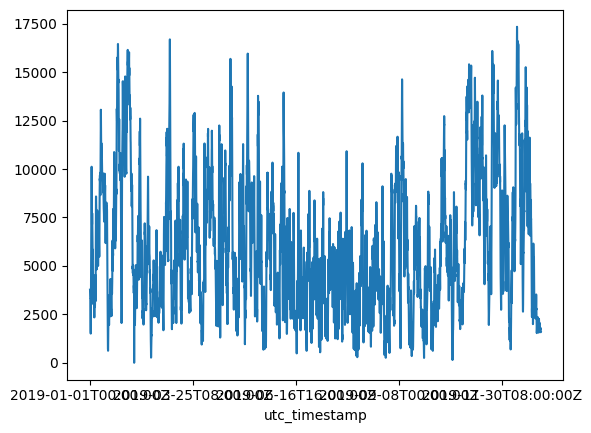

In [22]:
data_2019['ES_wind_onshore_generation_actual'].plot()

In [23]:
data_2019['ES_wind_onshore_generation_actual'].to_excel('./input_time_series/Spain/wind_onshore_generation_Spain_2019_opsd.xlsx', index = False)

# Format OSMOSE time series

In [51]:
data = pd.read_csv('input_time_series/solar_pv_2016.csv')

In [52]:
data = data[data['country']=='FR']

In [56]:
data

,country,timestamp,time_id,pv
105120,FR,2016-01-01 00:00:00,1,0.0
105121,FR,2016-01-01 01:00:00,2,0.0
105122,FR,2016-01-01 02:00:00,3,0.0
105123,FR,2016-01-01 03:00:00,4,0.0
105124,FR,2016-01-01 04:00:00,5,0.0
...,...,...,...,...
113875,FR,2016-12-31 19:00:00,8756,0.0
113876,FR,2016-12-31 20:00:00,8757,0.0
113877,FR,2016-12-31 21:00:00,8758,0.0
113878,FR,2016-12-31 22:00:00,8759,0.0


In [57]:
data['pv'].to_excel('input_time_series/France/France_solar_osmose_2016.xlsx', index = False)